# Cars Data analysis

Dataset Link : " https://www.kaggle.com/datasets/CooperUnion/cardataset "

Here I'll analyse cars dataset which i got from above source link and i'll perform following tasks -- 
1. EDA
2. Feature Engineering
3. Model Training

These steps can be considered for EDA ( Note -- Steps can vary for different dataset and requirements. These are not standard Steps but in most of the cases you can follow these steps and make changes according to your problem statement and requirments)


* Load dataset as dataframe using pandas
* Take a look at head and tail of data
* Check shape of data ( How many rows and Columns ?)

EDA :
* Starting with EDA, first we should handel the features(columns) -
1. Like we can have various number of features and we should keep only relevent features. So drop irrrelevent features to reduce the compaxity of the dataset.
2. For our better understanding and python compatibility, we can rename the features (column)

* Now, move to attributes (rows) of the dataframe for EDA
1. Duplicates  :  We should handel the duplicated rows. We can drop the duplicated rows because they are not useful
2. Missing Values  :  We should handel missing values in rows. For this, either drop the rows with missing values or fill the missing values with suitable method. Mean or Median can be used for continuous feature and Mode can be used for discrete feature.

* Visualixation : for better understanding the relationship amoung the features ( independent feature to dependent feature)
1. Univatiate Analysis
2. Bivariate Analysis
3. Multivariate Analysis

## Step 1 : EDA

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# reading dataset as dataframe
data = pd.read_csv("cars_data.csv")
data.head()                                   


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
# last five rows from dataframe
data.tail()                          

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [4]:
# shape of dataframe
data.shape

(11914, 16)

In [5]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [6]:
# columns such as Engine Fuel Type, Market Category, Vehicle style, Popularity, Number of doors, Vehicle Size seems irrelevent, so i am droping them

data = data.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'],axis=1)
data.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [7]:
# changing columns name for better understanding

data = data.rename(columns={'Make':'Company','Engine HP' : 'HP', 'Engine Cylinders': 'Cylinders', 'Transmission Type':'Transmission', 'Driven_Wheels':'Wheels', 'highway MPG':'MPG_Highway', 'city mpg':'MPG_City', 'MSRP':'Price'})
data.head()

,Company,Model,Year,HP,Cylinders,Transmission,Wheels,MPG_Highway,MPG_City,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [8]:
# checking duplicate rows
duplicated_rows_df = data[data.duplicated()]
print(f'Shape of duplicated_rows_df : {duplicated_rows_df.shape} \n')


Shape of duplicated_rows_df : (989, 10) 



In [9]:
# count number of rows in every column
data.count()

Company         11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Wheels          11914
MPG_Highway     11914
MPG_City        11914
Price           11914
dtype: int64

In [10]:
# lets drop duplicated rows because these can cause problem
data = data.drop_duplicates()


In [11]:
data.head()

,Company,Model,Year,HP,Cylinders,Transmission,Wheels,MPG_Highway,MPG_City,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [12]:
data.shape

(10925, 10)

In [13]:
data.duplicated().sum()

0

Let's handel if there are any missing values

In [14]:
# checking missing values
data.isnull().sum()

Company          0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Wheels           0
MPG_Highway      0
MPG_City         0
Price            0
dtype: int64

 Here we have 69 missing values in 'HP' column and 30 missing values in 'Cylinders' column.
 We can move forward with 2 ways in order to handel these missing values :
 1. Drop the columns with missing values (--  if detaset has enough rows and the rows with missing values are less compaire to total rows)
 2. Fill missing values with appropriate technique ( --  either mean or mode for continuous feature and Mode for discreate feature)

In [15]:
'''# drop rows with missing values

data = data.dropna()
print(data.isnull().sum())
print(f'\ncount of rows in every column : \n{data.count()}')'''


"# drop rows with missing values\n\ndata = data.dropna()\nprint(data.isnull().sum())\nprint(f'\ncount of rows in every column : \n{data.count()}')"

In [16]:
# Fill missing values
data['HP'] = data['HP'].fillna(data['HP'].mean())
data['Cylinders'] = data['Cylinders'].fillna(data['Cylinders'].mean())

In [17]:
print(f"Total missing values : {data.isnull().sum().sum()}")
print(f"count of rows : \n{data.count()}")

Total missing values : 0
count of rows : 
Company         10925
Model           10925
Year            10925
HP              10925
Cylinders       10925
Transmission    10925
Wheels          10925
MPG_Highway     10925
MPG_City        10925
Price           10925
dtype: int64


In [18]:
# data types
data.dtypes

Company          object
Model            object
Year              int64
HP              float64
Cylinders       float64
Transmission     object
Wheels           object
MPG_Highway       int64
MPG_City          int64
Price             int64
dtype: object

### Visualization
 -- Lets move to visualization part

<Axes: ylabel='HP'>

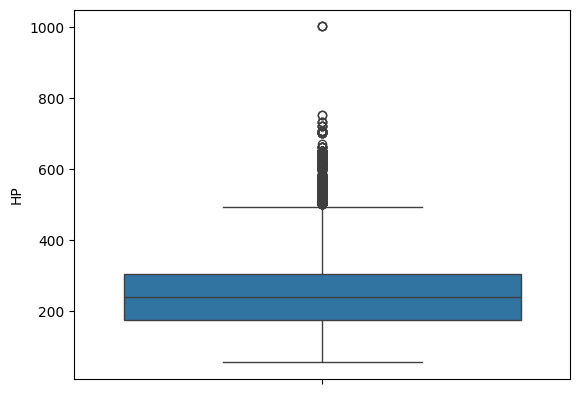

In [19]:
# outlier detection
sns.boxplot(data['HP'])

<Axes: ylabel='Cylinders'>

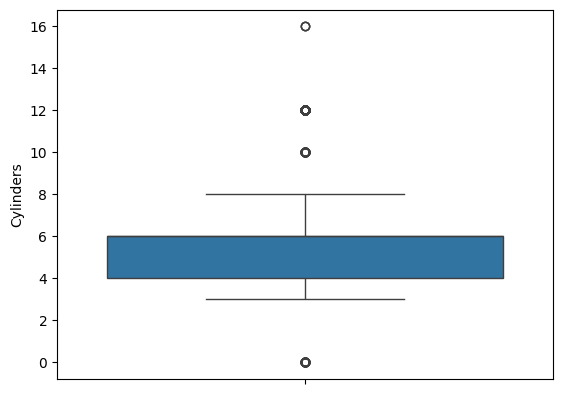

In [20]:
sns.boxplot(data['Cylinders'])

<Axes: ylabel='Price'>

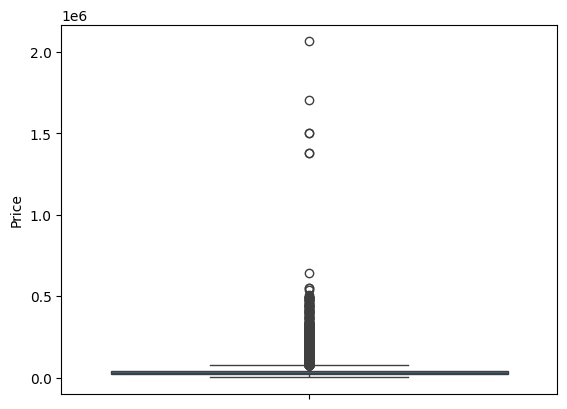

In [21]:
sns.boxplot(data['Price'])

To handel outliers, there are saveral ways. Following are the popular one amoung them :
1. IQR range
2. Log transformation

In [22]:
# taking IQR Data for 'HP' columns
q1 = data['HP'].quantile(0.25)
q3 = data['HP'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# removing outliers data
data = data[~((data['HP'] <= lower_bound) | (data['HP'] >= upper_bound))]

In [23]:
#  taking IQR Data for 'Cylinders' column
q1 = data['Cylinders'].quantile(0.25)
q3 = data['Cylinders'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# removing outliers data
data = data[~((data['Cylinders'] <= lower_bound) | (data['Cylinders'] >= upper_bound))]

In [24]:
#  taking IQR Data for 'Price' column
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# removing outliers data
data = data[~((data['Price'] <= lower_bound) | (data['Price'] >= upper_bound))]

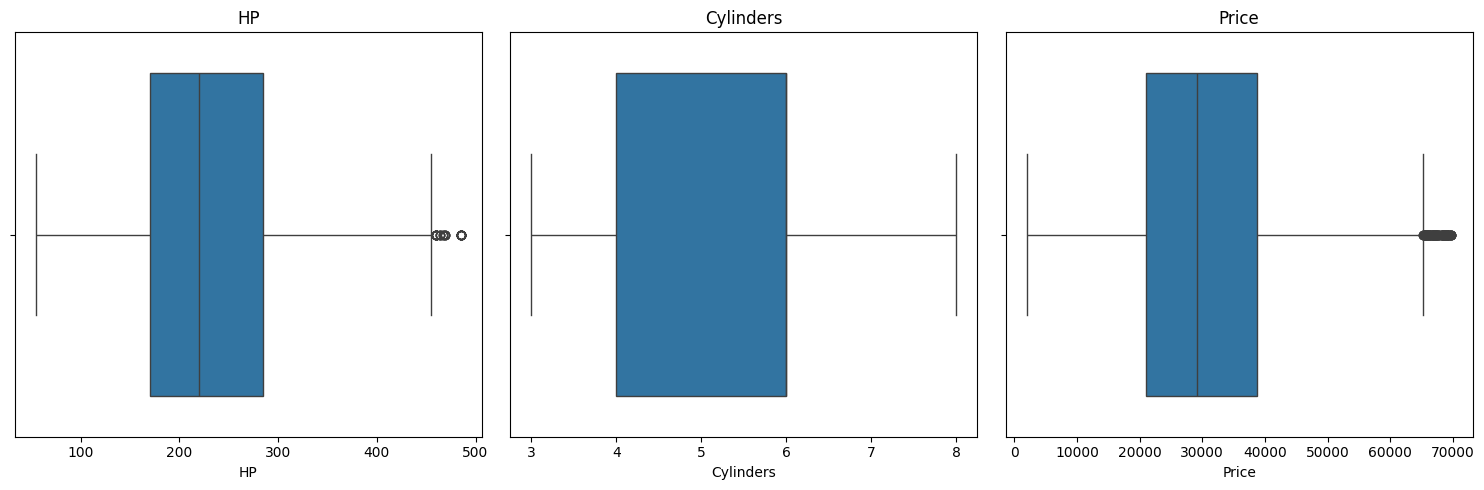

In [25]:
columns_to_plot = ['HP', 'Cylinders', 'Price']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))

# Create boxplots for each column
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

 -- Let's move to visualization of features to understand the features (columns) better

Text(0.5, 0, 'Company')

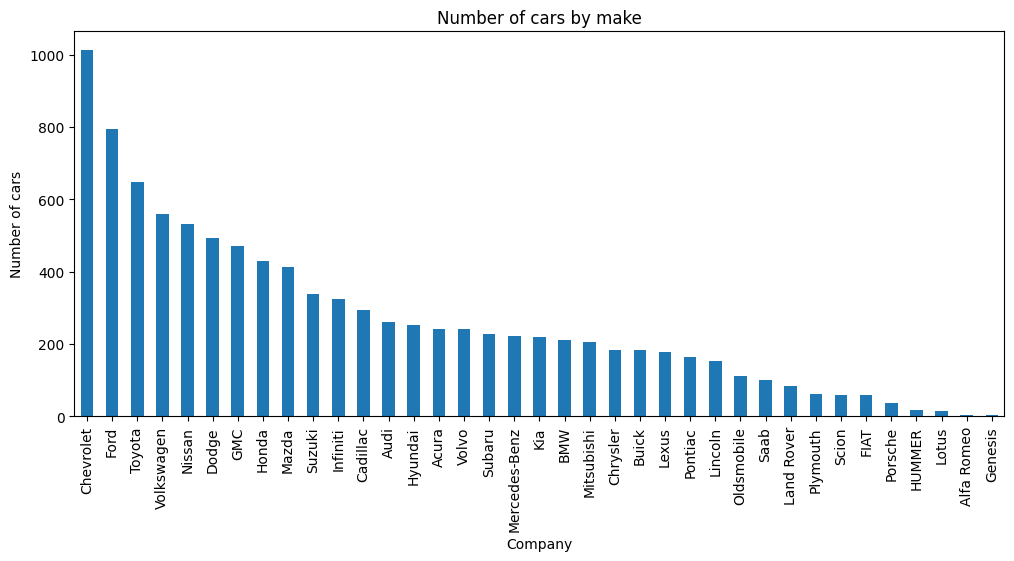

In [27]:
# lets us know the total number of car manufactured by a different company(Make)
data.Company.value_counts().nlargest(40).plot(kind='bar', figsize=(12,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Company')

In [28]:
data['Company'].value_counts()

Company
Chevrolet        1013
Ford              795
Toyota            649
Volkswagen        558
Nissan            532
Dodge             492
GMC               472
Honda             429
Mazda             412
Suzuki            338
Infiniti          325
Cadillac          293
Audi              262
Hyundai           254
Acura             241
Volvo             241
Subaru            229
Mercedes-Benz     223
Kia               219
BMW               212
Mitsubishi        205
Chrysler          185
Buick             184
Lexus             179
Pontiac           163
Lincoln           152
Oldsmobile        111
Saab              101
Land Rover         85
Plymouth           62
Scion              60
FIAT               58
Porsche            37
HUMMER             17
Lotus              16
Alfa Romeo          5
Genesis             3
Name: count, dtype: int64

In [33]:
# lets take numerical and categorical columns
num_cols = data.select_dtypes(include=(int,float))
print(num_cols.head(2))

   Year     HP  Cylinders  MPG_Highway  MPG_City  Price
0  2011  335.0        6.0           26        19  46135
1  2011  300.0        6.0           28        19  40650


<Axes: >

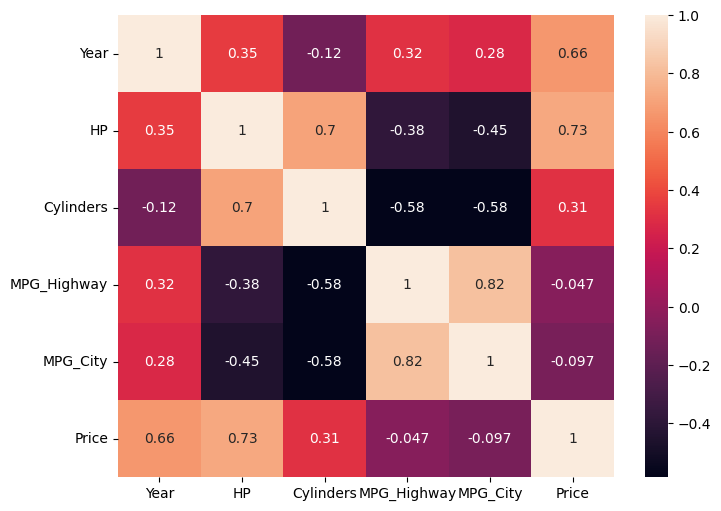

In [36]:
# check corelation in the features
plt.figure(figsize=(8,6))
corr = num_cols.corr()
sns.heatmap(corr,annot=True)

Here :
* +1 = Positive co-relation
* -1 = Negative co-relation
*  0 = No relation

We can observe that HP and year have good co-relation with price
* HP (Hourse Power) has co-relation of 0.73 with price
* Year has co-relation of 0.66 with price

Now we can use scatter plot to visualaize HP and price ( Note - Mostly sctter plot is used to visualize two features)

<Axes: xlabel='HP', ylabel='Price'>

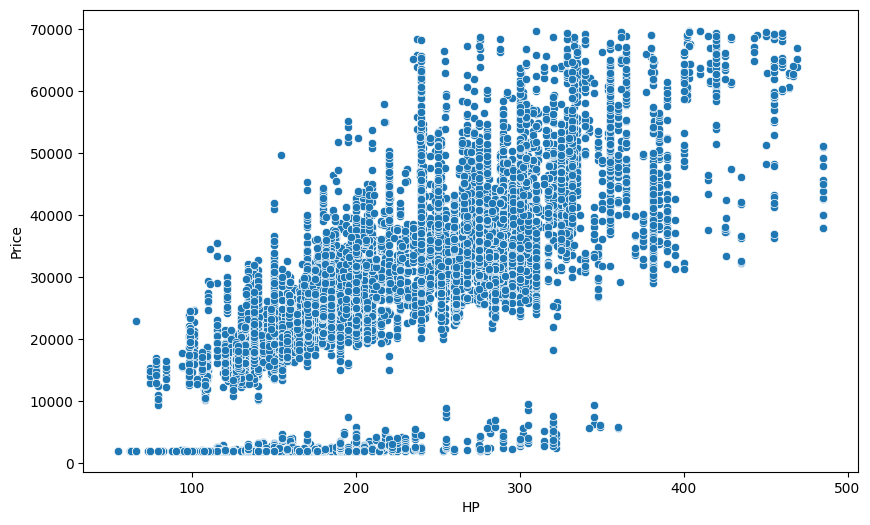

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['HP'],y=data['Price'])